### In this File: Regression Analysis and Machine Learning 

#### 1. Import Libraries and Dataset

#### 2. Clean Data

## Import Libaries

In [347]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [348]:
%matplotlib inline

## Import Data

In [349]:
df=pd.read_csv(r'C:\Users\Jason\OneDrive\Documents\Achievement 6\Human Development Data\HumanDevData.csv')

## Filter Data to Most Current Year (2020)

In [350]:
df=df[df['Year']==2020]

## Clean Data

In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, 30 to 6044
Data columns (total 10 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Country                                                       195 non-null    object 
 1   Key Var                                                       195 non-null    object 
 2   Year                                                          195 non-null    int64  
 3   Expected Years of Schooling                                   190 non-null    float64
 4   Gender Dev Index (Gender Inequality)                          172 non-null    float64
 5   Gross National Income Per Capita                              193 non-null    float64
 6   Human Development Index                                       191 non-null    float64
 7   Labour force participation rate, female % ages 15 and older)  180 non-null

In [352]:
## Drop Key Var Column
df.drop(columns='Key Var', inplace=True)

In [353]:
## See Headers 
df.head(20)

,Country,Year,Expected Years of Schooling,Gender Dev Index (Gender Inequality),Gross National Income Per Capita,Human Development Index,"Labour force participation rate, female % ages 15 and older)",Life Expectancy,"Maternal Mortality Ratio (deaths per 100,000 live births)"
30,Afghanistan,2020,10.263844,0.689,1997.852149,0.483,16.189,62.5751,638.0
61,Angola,2020,12.172100,0.904,5593.142060,0.590,73.618,62.2612,241.0
92,Albania,2020,14.695620,1.006,12996.762910,0.794,49.786,76.9893,15.0
123,Andorra,2020,13.046476,NaN,47878.666640,0.848,NaN,79.0234,NaN
154,United Arab Emirates,2020,13.421310,0.952,63016.401220,0.912,45.703,78.9457,3.0
185,Argentina,2020,17.409550,0.999,19178.331840,0.840,46.642,75.8921,39.0
216,Armenia,2020,13.103540,0.995,12454.145080,0.757,41.961,72.1730,26.0
247,Antigua and Barbuda,2020,20.462240,NaN,16265.295150,0.788,NaN,78.8406,42.0
278,Australia,2020,15.001230,0.966,47078.244460,0.947,60.173,84.3239,6.0
309,Austria,2020,9.938560,0.979,51574.183060,0.913,55.621,81.5036,5.0


#### Check for Missing Values

In [354]:
df.isnull().sum()

Country                                                          0
Year                                                             0
Expected Years of Schooling                                      5
Gender Dev Index (Gender Inequality)                            23
Gross National Income Per Capita                                 2
Human Development Index                                          4
Labour force participation rate, female % ages 15 and older)    15
Life Expectancy                                                  0
Maternal Mortality Ratio (deaths per 100,000 live births)       11
dtype: int64

In [355]:
## Drop NaNs
df=df.dropna()
df.head(20)

,Country,Year,Expected Years of Schooling,Gender Dev Index (Gender Inequality),Gross National Income Per Capita,Human Development Index,"Labour force participation rate, female % ages 15 and older)",Life Expectancy,"Maternal Mortality Ratio (deaths per 100,000 live births)"
30,Afghanistan,2020,10.263844,0.689,1997.852149,0.483,16.189,62.5751,638.0
61,Angola,2020,12.172100,0.904,5593.142060,0.590,73.618,62.2612,241.0
92,Albania,2020,14.695620,1.006,12996.762910,0.794,49.786,76.9893,15.0
154,United Arab Emirates,2020,13.421310,0.952,63016.401220,0.912,45.703,78.9457,3.0
185,Argentina,2020,17.409550,0.999,19178.331840,0.840,46.642,75.8921,39.0
216,Armenia,2020,13.103540,0.995,12454.145080,0.757,41.961,72.1730,26.0
278,Australia,2020,15.001230,0.966,47078.244460,0.947,60.173,84.3239,6.0
309,Austria,2020,9.938560,0.979,51574.183060,0.913,55.621,81.5036,5.0
340,Azerbaijan,2020,4.713882,0.977,13567.937100,0.730,59.161,66.8679,26.0
371,Burundi,2020,16.851589,0.938,735.737104,0.426,79.143,61.5663,548.0


In [356]:
missing_values = df.isnull().sum()
print(missing_values)

Country                                                         0
Year                                                            0
Expected Years of Schooling                                     0
Gender Dev Index (Gender Inequality)                            0
Gross National Income Per Capita                                0
Human Development Index                                         0
Labour force participation rate, female % ages 15 and older)    0
Life Expectancy                                                 0
Maternal Mortality Ratio (deaths per 100,000 live births)       0
dtype: int64


#### Check Descriptive Statistics

In [357]:
df.describe()

,Year,Expected Years of Schooling,Gender Dev Index (Gender Inequality),Gross National Income Per Capita,Human Development Index,"Labour force participation rate, female % ages 15 and older)",Life Expectancy,"Maternal Mortality Ratio (deaths per 100,000 live births)"
count,166.0,166.000000,166.00000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,2020.0,11.947837,0.94906,19233.205016,0.725295,49.531283,72.064543,156.355422
std,0.0,3.607529,0.05684,19150.185496,0.151669,14.868598,7.494864,235.785368
min,2020.0,2.666200,0.68900,735.737104,0.386000,11.066000,52.777400,2.000000
25%,2020.0,10.073282,0.91800,4787.392757,0.608500,41.984500,66.779825,10.250000
50%,2020.0,12.532180,0.96700,12023.151725,0.739000,51.188000,72.668950,44.000000
75%,2020.0,14.482245,0.98800,28348.234310,0.846750,58.501250,77.529075,184.500000
max,2020.0,19.756161,1.03400,83720.695030,0.959000,82.291000,84.687900,1150.000000


#### Check for Duplicates

In [358]:
hdi_dup_values = df[df.duplicated()]
print(hdi_dup_values)

Empty DataFrame
Columns: [Country, Year, Expected Years of Schooling, Gender Dev Index (Gender Inequality), Gross National Income Per Capita, Human Development Index, Labour force participation rate, female % ages 15 and older), Life Expectancy, Maternal Mortality Ratio (deaths per 100,000 live births)]
Index: []


## Extreme Value Checks with Dist Plots- ChatGPT Helped Me Do All of Them At Once

C:\Users\Jason\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


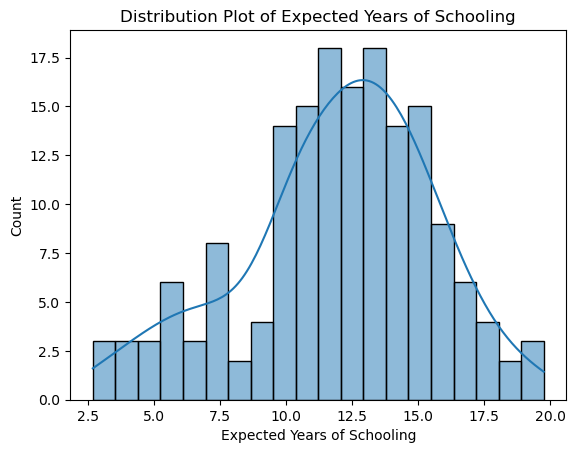

C:\Users\Jason\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


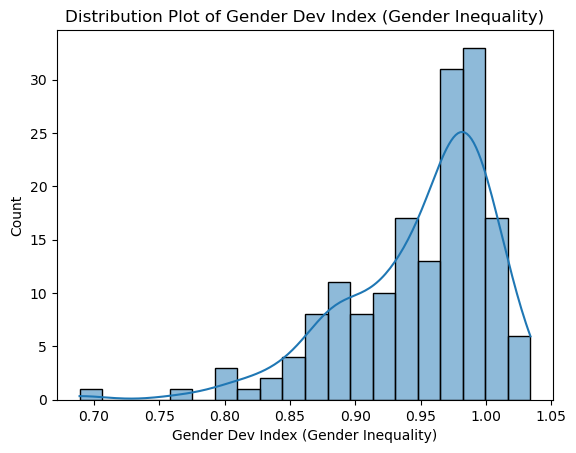

C:\Users\Jason\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


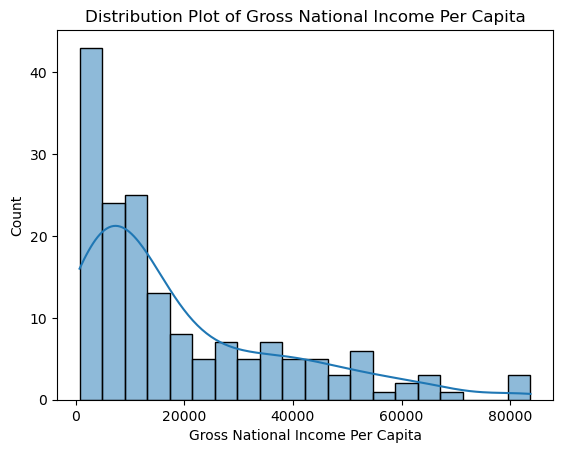

C:\Users\Jason\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


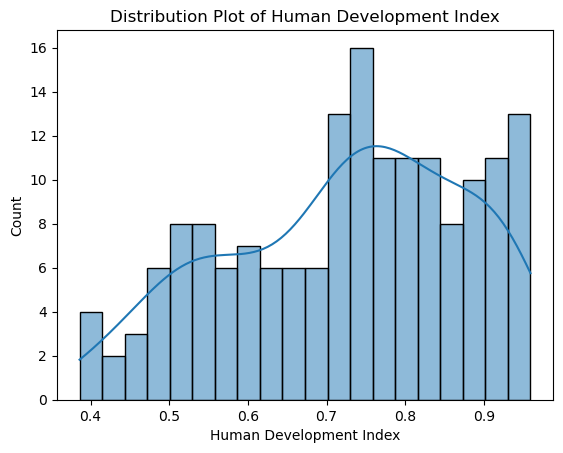

C:\Users\Jason\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


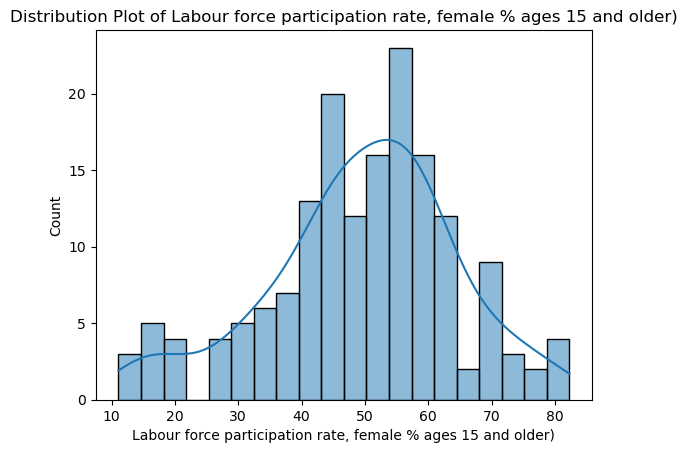

C:\Users\Jason\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


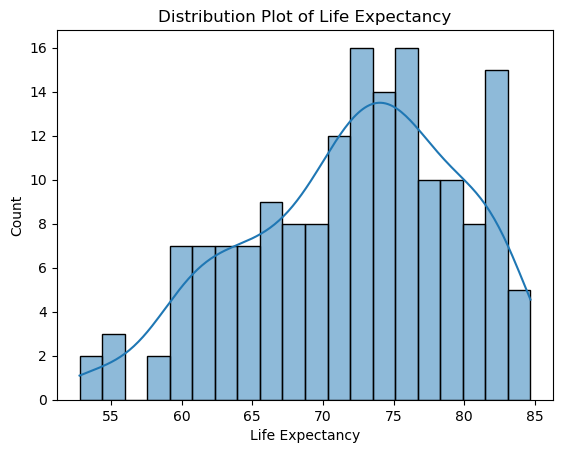

C:\Users\Jason\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


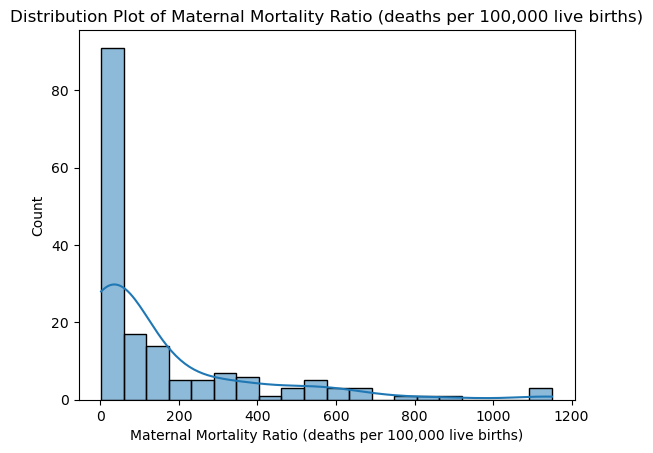

In [359]:
# Specify the columns you want to create distribution plots for
selected_columns = [
    'Expected Years of Schooling',
    'Gender Dev Index (Gender Inequality)',
    'Gross National Income Per Capita',
    'Human Development Index',
    'Labour force participation rate, female % ages 15 and older)',
    'Life Expectancy',
    'Maternal Mortality Ratio (deaths per 100,000 live births)'
]

# Loop through each specified column
for column in selected_columns:
    # Create a distribution plot for the current variable
    sns.histplot(df[column], kde=True, bins=20)
    # Set plot title with the variable name
    plt.title(f'Distribution Plot of {column}')
    # Show the plot
    plt.show()


## Get Min, Max, and Mean for Each Column- Chat GPT Assisted

In [360]:
life_expectancy_stats = df['Life Expectancy'].describe()
selected_stats = life_expectancy_stats[['min', 'max', 'mean']]
print(selected_stats)

min     52.777400
max     84.687900
mean    72.064543
Name: Life Expectancy, dtype: float64


In [361]:
# Compute descriptive statistics for the 'Expected Years of Schooling' column
expected_years_stats = df['Expected Years of Schooling'].describe()

# Select specific statistics (min, max, mean)
selected_stats_expected_years = expected_years_stats[['min', 'max', 'mean']]

# Print statistics for the 'Expected Years of Schooling' column
print("Statistics for 'Expected Years of Schooling' column:")
print(selected_stats_expected_years)


Statistics for 'Expected Years of Schooling' column:
min      2.666200
max     19.756161
mean    11.947837
Name: Expected Years of Schooling, dtype: float64


In [362]:
# Compute descriptive statistics for the 'Gross National Income Per Capita' column
gni_stats = df['Gross National Income Per Capita'].describe()

# Select specific statistics (min, max, mean)
selected_stats_gni = gni_stats[['min', 'max', 'mean']]

# Print statistics for the 'Gross National Income Per Capita' column
print("Statistics for 'Gross National Income Per Capita' column:")
print(selected_stats_gni)


Statistics for 'Gross National Income Per Capita' column:
min       735.737104
max     83720.695030
mean    19233.205016
Name: Gross National Income Per Capita, dtype: float64


In [363]:
# Compute descriptive statistics for the 'Gross National Income Per Capita' column
gni_stats = df['Gross National Income Per Capita'].describe()

# Select specific statistics (min, max, mean)
selected_stats_gni = gni_stats[['min', 'max', 'mean']]

# Print statistics for the 'Gross National Income Per Capita' column
print("Statistics for 'Gross National Income Per Capita' column:")
print(selected_stats_gni)


Statistics for 'Gross National Income Per Capita' column:
min       735.737104
max     83720.695030
mean    19233.205016
Name: Gross National Income Per Capita, dtype: float64


In [364]:
# Compute descriptive statistics for the 'Human Development Index' column
hdi_stats = df['Human Development Index'].describe()

# Select specific statistics (min, max, mean)
selected_stats_hdi = hdi_stats[['min', 'max', 'mean']]

# Print statistics for the 'Human Development Index' column
print("Statistics for 'Human Development Index' column:")
print(selected_stats_hdi)


Statistics for 'Human Development Index' column:
min     0.386000
max     0.959000
mean    0.725295
Name: Human Development Index, dtype: float64


In [365]:
# Compute descriptive statistics for the 'Labour force participation rate, female % ages 15 and older)' column
labour_force_stats = df['Labour force participation rate, female % ages 15 and older)'].describe()

# Select specific statistics (min, max, mean)
selected_stats_labour_force = labour_force_stats[['min', 'max', 'mean']]

# Print statistics for the 'Labour force participation rate, female % ages 15 and older)' column
print("Statistics for 'Labour force participation rate, female % ages 15 and older)' column:")
print(selected_stats_labour_force)


Statistics for 'Labour force participation rate, female % ages 15 and older)' column:
min     11.066000
max     82.291000
mean    49.531283
Name: Labour force participation rate, female % ages 15 and older), dtype: float64


In [366]:
# Compute descriptive statistics for the 'Maternal Mortality Ratio (deaths per 100,000 live births)' column
maternal_mortality_stats = df['Maternal Mortality Ratio (deaths per 100,000 live births)'].describe()

# Select specific statistics (min, max, mean)
selected_stats_maternal_mortality = maternal_mortality_stats[['min', 'max', 'mean']]

# Print statistics for the 'Maternal Mortality Ratio (deaths per 100,000 live births)' column
print("Statistics for 'Maternal Mortality Ratio (deaths per 100,000 live births)' column:")
print(selected_stats_maternal_mortality)


Statistics for 'Maternal Mortality Ratio (deaths per 100,000 live births)' column:
min        2.000000
max     1150.000000
mean     156.355422
Name: Maternal Mortality Ratio (deaths per 100,000 live births), dtype: float64


## Preparing Data for Regression

#### Create Scatterplot to See How Actual Data Relates to Each Other

Text(0, 0.5, 'Expected Years of Schooling')

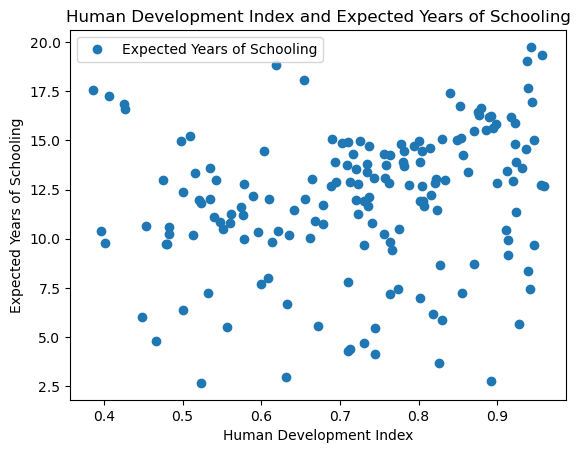

In [367]:
# Scatterplot

df.plot(x='Human Development Index', y='Expected Years of Schooling', style='o')
plt.title('Human Development Index and Expected Years of Schooling')
plt.xlabel('Human Development Index')
plt.ylabel('Expected Years of Schooling')


C:\Users\Jason\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jason\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jason\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jason\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

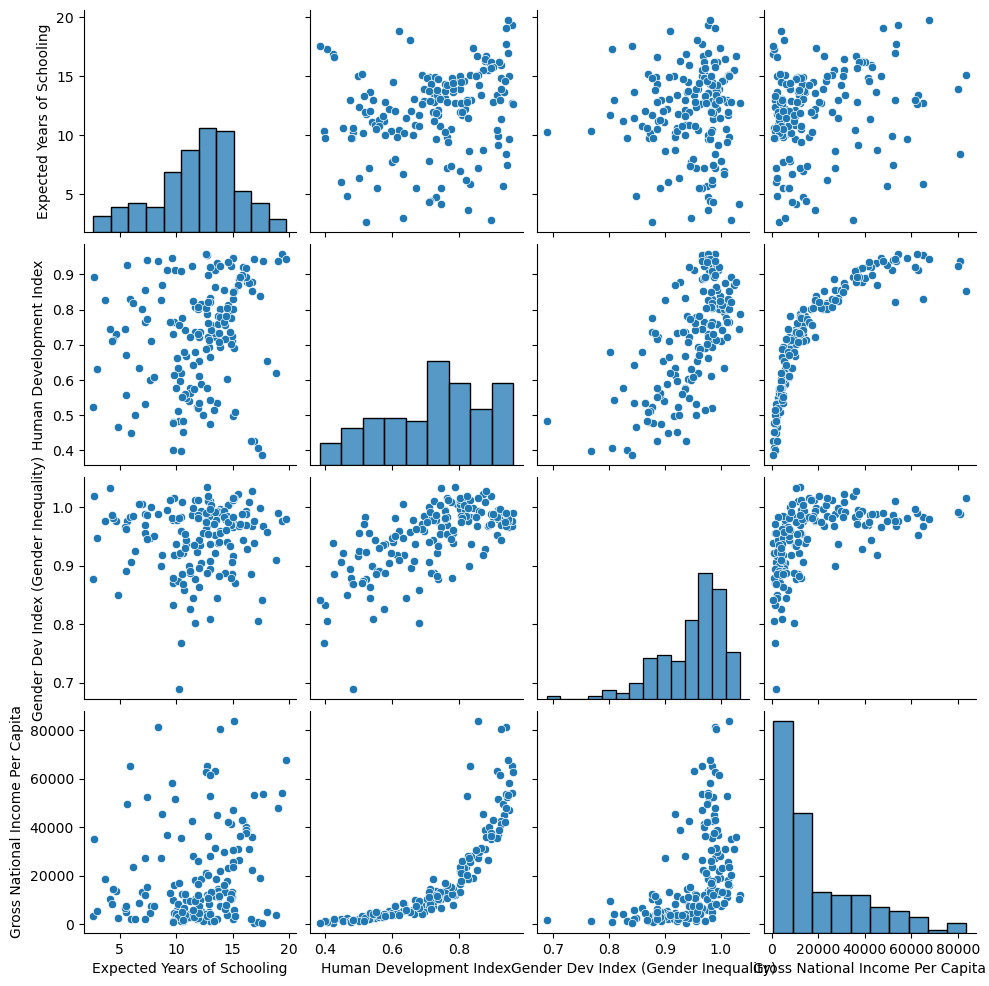

In [368]:
# Define the columns you want to include in the scatterplot matrix
scatter_columns = ['Expected Years of Schooling', 'Human Development Index', 'Gender Dev Index (Gender Inequality)', 'Gross National Income Per Capita']

# Create the scatterplot matrix
sns.pairplot(df[scatter_columns])

# Display the plot
plt.show()


## Hypothesis 

As the GNI Per Capita of a country increases, the expected years of schooling will also increase.

In [369]:
X=df['Gross National Income Per Capita'].values.reshape(-1,1)
y=df['Life Expectancy'].values.reshape(-1,1)

In [370]:
X

array([[ 1997.852149 ],
       [ 5593.14206  ],
       [12996.76291  ],
       [63016.40122  ],
       [19178.33184  ],
       [12454.14508  ],
       [47078.24446  ],
       [51574.18306  ],
       [13567.9371   ],
       [  735.7371044],
       [49391.99684  ],
       [ 3288.470605 ],
       [ 2038.513202 ],
       [ 5108.160545 ],
       [22020.49393  ],
       [39030.38571  ],
       [14381.63676  ],
       [18307.70473  ],
       [ 5897.150457 ],
       [ 7756.177294 ],
       [13790.71143  ],
       [12167.22012  ],
       [65077.71446  ],
       [ 9898.25027  ],
       [14696.02701  ],
       [  974.4816457],
       [45038.07302  ],
       [65011.21711  ],
       [22285.86026  ],
       [18753.91088  ],
       [10031.66906  ],
       [ 2279.637186 ],
       [ 2118.782628 ],
       [ 2939.863103 ],
       [ 5038.816043 ],
       [ 3844.117012 ],
       [12718.46051  ],
       [ 5897.676779 ],
       [10530.29914  ],
       [35131.82128  ],
       [ 2440.015962 ],
       [27185.25

In [371]:
y

array([[62.5751],
       [62.2612],
       [76.9893],
       [78.9457],
       [75.8921],
       [72.173 ],
       [84.3239],
       [81.5036],
       [66.8679],
       [61.5663],
       [80.7884],
       [60.088 ],
       [59.7306],
       [71.9678],
       [73.6453],
       [79.1735],
       [76.2254],
       [72.5132],
       [72.854 ],
       [64.4667],
       [74.0089],
       [77.3929],
       [74.7949],
       [71.6094],
       [65.6471],
       [54.6042],
       [82.0471],
       [83.067 ],
       [79.3769],
       [79.277 ],
       [72.1535],
       [65.3705],
       [62.6125],
       [64.0518],
       [64.5321],
       [69.2456],
       [72.5726],
       [74.8077],
       [74.4528],
       [78.3431],
       [59.3273],
       [77.9845],
       [61.1722],
       [62.8513],
       [72.8894],
       [71.4619],
       [82.2892],
       [64.114 ],
       [72.141 ],
       [66.4077],
       [81.5449],
       [72.7653],
       [76.2575],
       [72.1191],
       [75.3779],
       [80

#### Split Data into Training and Testing Set

In [372]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3, random_state=0)

## Do a Regression

In [373]:
## Convert Linear Regression () to regression
regression=LinearRegression()

In [374]:
regression.fit(X_train, y_train)

LinearRegression()

In [375]:
## Predict Y values using X values
predicted_y_values=regression.predict(X_train)

#### Regression Results

In [376]:
rmse=mean_squared_error(y_train, predicted_y_values)
r2=r2_score(y_train, predicted_y_values) ## R Squared 

In [377]:
## Print Stats
print('R Squared')
print(r2)
print ('RMSE')
print(rmse)

R Squared
0.5937219396094164
RMSE
25.07165648168955


#### Test Set

In [378]:
pred_y_test_set=regression.predict(X_test)

#### Test Set Regression Results

In [379]:
rmse=mean_squared_error(y_test, pred_y_test_set)
r2= r2_score(y_test, pred_y_test_set)

In [380]:
print('R Squared')
print(r2)
print('RMSE')
print(rmse)

R Squared
0.3541783199744981
RMSE
25.61896894023389


## Training and Test Set Fit 

Training vs. Test Set 
The training set had a better fit that the test fit with an R Squared of 0.59 vs. a 0.35. The training set had a slightly better RMSE (25.07) than the test set (25.61).

In [381]:
predictedvsactual=pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': pred_y_test_set.flatten()})
print(predictedvsactual)

     Actual  Predicted
0   70.1328  71.145344
1   59.7392  65.983564
2   79.8747  69.403430
3   80.4345  79.163574
4   74.7571  74.348264
5   75.3779  68.117647
6   81.5036  82.097668
7   72.1730  69.620592
8   60.8328  66.792237
9   75.2923  68.852553
10  72.5615  69.887676
11  62.8290  68.426585
12  82.4274  82.348048
13  76.2392  80.074938
14  72.7653  69.899790
15  66.2695  67.073221
16  75.1677  70.531700
17  74.4035  67.651279
18  71.4619  67.176810
19  75.1843  68.770473
20  73.6655  69.130236
21  64.0518  66.586075
22  68.4858  71.640739
23  69.1228  68.730377
24  82.0471  80.013019
25  68.8077  69.201954
26  83.1951  85.605647
27  66.8679  69.975829
28  79.2739  71.007875
29  74.8077  67.529450
30  72.8894  70.804113
31  81.4335  91.255061
32  67.9244  68.982092
33  71.7969  68.276979
34  71.3423  73.889283
35  65.6471  70.335625
36  78.0766  70.815739
37  81.3905  77.296012
38  64.4667  68.122207
39  83.3545  77.017182
40  67.9942  67.002126
41  82.4699  87.252332
42  76.2254

The model did not fit the test set well as evidenced by the R Squared value and the fact that the predicted set was pretty far from the actual set.
Possible Sources of Bias/Data Quality Issues:
1. 2020 was a strange year with the pandemic. 2020 could be an outlier year. 2019 was studied and the R2 of the training set was 0.56 and the R Squared of the test set was 0.55. There is still a solid amount of difference.
2. There could be some countries that do not have correct data, such as countries with a high degree of poverty that do not have a substantial number of educational, income, and health records. It is very hard to have correct metrics if a high percentage of that data is missing.